<a href="https://colab.research.google.com/github/yogiannanf/PembelajaranMesin/blob/main/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face Detection**

Nama : Yogianna Nur Febrianti

Kelas : TI 3A

Absen : 28

In [1]:
import cv2

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
imagePath = "/content/drive/MyDrive/Data_Machine_Learn/images/yogii.png"

In [7]:
img = cv2.imread(imagePath)

In [8]:
img.shape

(577, 433, 3)

In [9]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
gray_image.shape

(577, 433)

In [11]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [12]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [13]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 432.5, 576.5, -0.5)

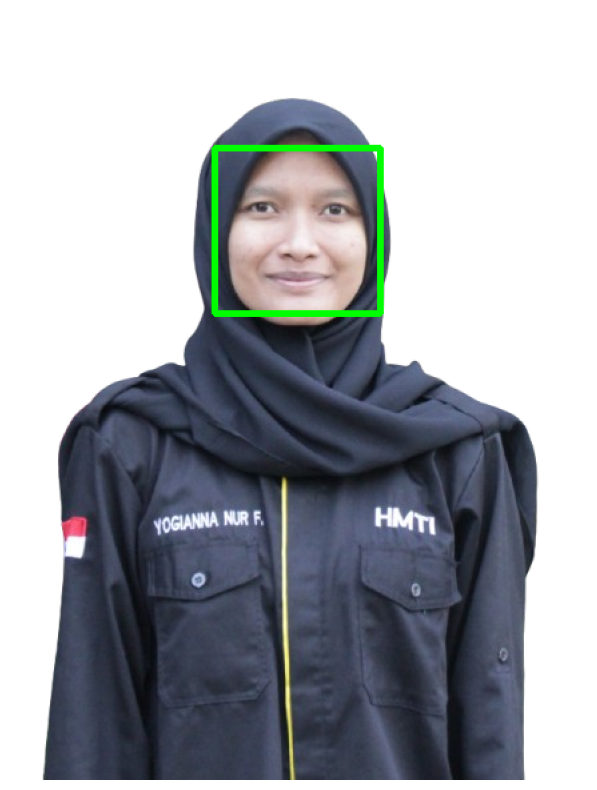

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

- Deteksi mata haar cascade

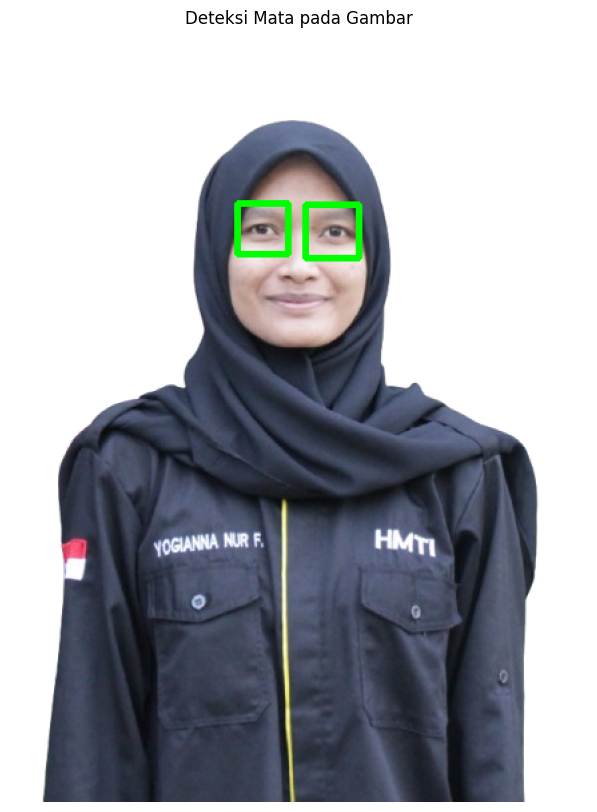

In [17]:
import cv2
import matplotlib.pyplot as plt

# Path gambar
imagePath = '/content/drive/MyDrive/Data_Machine_Learn/images/yogii.png'  # Pastikan path sesuai dengan file yang diunggah

# Membaca gambar
img = cv2.imread(imagePath)

# Memeriksa apakah gambar berhasil dibaca
if img is None:
    print("Gambar tidak ditemukan. Periksa path gambar.")
else:
    # Mengonversi gambar ke grayscale untuk deteksi yang lebih akurat
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Memuat classifier Haar Cascade untuk deteksi wajah dan mata
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Deteksi wajah pada gambar
    faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (fx, fy, fw, fh) in faces:
        # Kotak untuk wajah dihapus, jadi bagian ini dikomentari
        # cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 0, 0), 4)

        # Wilayah untuk deteksi mata dalam wajah
        roi_gray = gray_image[fy:fy+fh, fx:fx+fw]
        roi_color = img[fy:fy+fh, fx:fx+fw]

        # Deteksi mata dalam wajah yang terdeteksi
        eyes = eye_classifier.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
        for (ex, ey, ew, eh) in eyes:
            # Gambar kotak hijau di sekitar mata yang terdeteksi
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 4)

    # Mengonversi gambar dari BGR ke RGB untuk menampilkan dengan matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar dengan deteksi mata
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Menghilangkan axis
    plt.title("Deteksi Mata pada Gambar")
    plt.show()